# Importing Libraries

In [208]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import datetime as dt

from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score,classification_report,silhouette_score
from scipy.cluster.hierarchy import cophenet,linkage,dendrogram
from scipy.spatial.distance import pdist

# Loading Dataset

In [47]:
df = pd.read_csv('online_shoppers_intention.csv')
df.head() # printing first five rows from dataset

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

# Data Interpretation

In [48]:
df.shape # finding number of rows and columns in dataset

(12330, 18)

In [49]:
df.info() # as we see no null values as each column having 12330 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [50]:
df.dtypes # checking datatypes of each column

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [142]:
df.isnull().sum() # checking null values in dataset

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [51]:
df.VisitorType.value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [52]:
df.Month.value_counts() # we have to replace each month with their respective number 

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

In [53]:
df.Weekend.value_counts() # have to chenge in 0,1 format 0-False(No weekend) and 1-True(weekend)

False    9462
True     2868
Name: Weekend, dtype: int64

In [54]:
df.Revenue.value_counts() # have to convert in 0,1 format 0-False and 1-True

False    10422
True      1908
Name: Revenue, dtype: int64

<b>Replacing Values Into 0 and 1 with Boolean Value</b>

In [61]:
df['Revenue'].replace({False:0,True:1},inplace=True)
df['Weekend'].replace({False:0,True:1},inplace=True)

In [62]:
df.Revenue.value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

In [63]:
df.Weekend.value_counts()

0    9462
1    2868
Name: Weekend, dtype: int64

<b>Changing Data Type For Month Column From Object To DateTime</b>

In [87]:
df['Month'] = df['Month'].replace({'May':5,'Feb':2,'Mar':3,'Nov':11,'Dec':12,'Jan':1,'Apr':4,'June':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10})

In [88]:
df['Month'] = pd.to_datetime(df['Month'],format='%m')

<b>Separating data into catagorical and numerical</b>

In [93]:
cat_cols = df.select_dtypes([object]) # categorical columns
num_cols = df.select_dtypes(np.number) # numerical columns

In [94]:
cat_cols.columns

Index(['VisitorType'], dtype='object')

In [95]:
num_cols.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Revenue'],
      dtype='object')

In [96]:
# five summary for numerical columns

num_cols.describe()

Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.000000               184.137500   
50%                  0.000000       18.000000               598.936905   
75%                  0.000000       38.000000              1464.157214   
max               2549.375000      705.000000             63973.522230   

        BounceRates     ExitRates    PageValues    SpecialDay  \
count  12330.000000  12330.000000  12330.000000  12330.000000   
mean       0.022191      0.043073      5.889258      0.061427   
std        0.048488      0.048597     18.568437      0.198917   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.014286      0.000000      0.000000   
50%        0.003112      0.025156      0.000000      0.000000   
75%        0.016813      0.050000      0.000000      0.000000   
max        0.200000      0.200000    361.763742      1.000000   

       OperatingSystems       Browser        Region   TrafficType  \
count      12330.000000  12330.000000  12330.000000  12330.000000   
mean           2.124006      2.357097      3.147364      4.069586   
std            0.911325      1.717277      2.401591      4.025169   
min            1.000000      1.000000      1.000000      1.000000   
25%            2.000000      2.000000      1.000000      2.000000   
50%            2.000000      2.000000      3.000000      2.000000   
75%            3.000000      2.000000      4.000000      4.000000   
max            8.000000     13.000000      9.000000     20.000000   

            Weekend       Revenue  
count  12330.000000  12330.000000  
mean       0.232603      0.154745  
std        0.422509      0.361676  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max        1.000000      1.000000

- In Administrative, Administrative_Duration, Informational, Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues having minimum value 0.
- Maximum columns having floating value.
- As we see all those column having zero values it is ok for these column as customer can come and go so duration should be zero for those pages. 
- For BounceRate,ExitRate,PageValues those are percentile columns also these can have zero value.

In [97]:
# categorical column summary

cat_cols.describe()

VisitorType
count               12330
unique                  3
top     Returning_Visitor
freq                10551

- Total 3 types of visitors who was came on the site for either making revenue for company or nor making revenue just go through it.

# Univariate Analysis

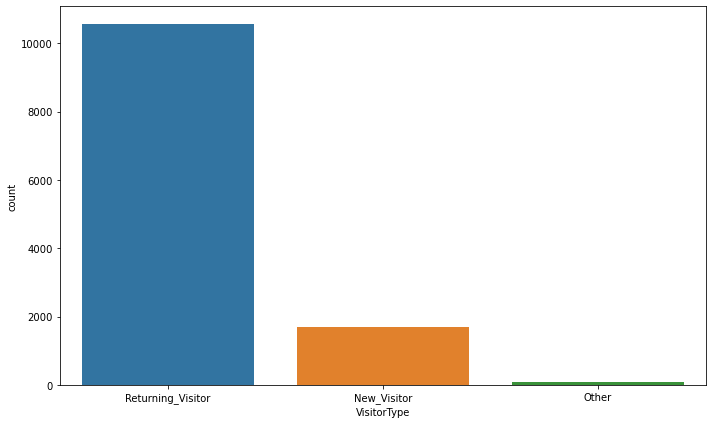

In [105]:
# for categorical variables

plt.figure(figsize=(10,6))
sns.countplot(cat_cols['VisitorType'])
plt.tight_layout()
plt.show()

- Maximum visitors are came on the site and return back without any prchasing product.
- Less peoples are new visiters.
- Very less people came on site and purchase products and making revenue for company.

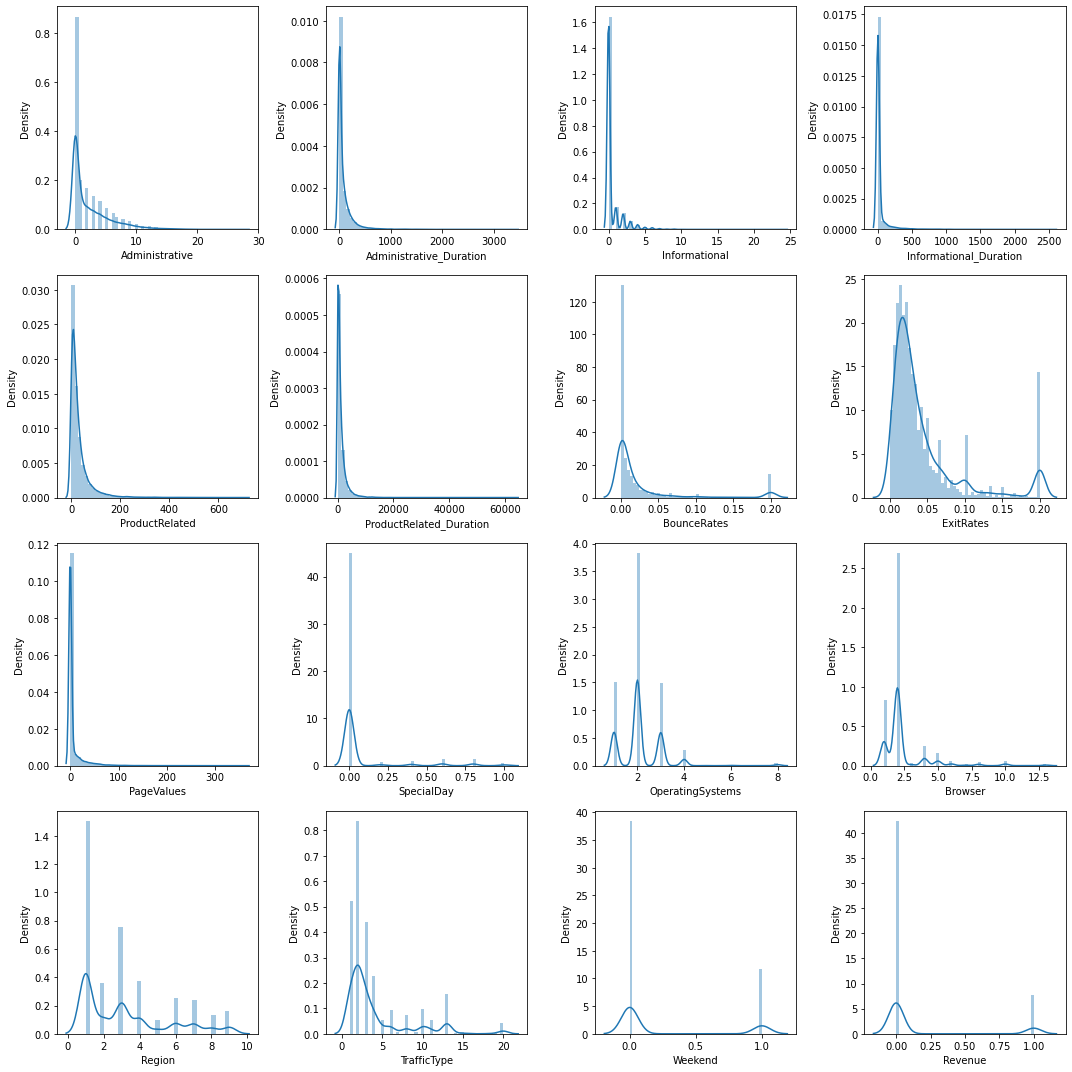

In [110]:
# for numerical variables

fig, axes = plt.subplots(4,4,figsize=(15,15))
for i, subplot in zip(num_cols.columns, axes.flatten()):
    sns.distplot(num_cols[i],ax=subplot)
plt.tight_layout()
plt.show()

- Data is not normal in most of the columns.
- Some columns are categorical in nature as they have different peak points.

# Bivariate Analysis

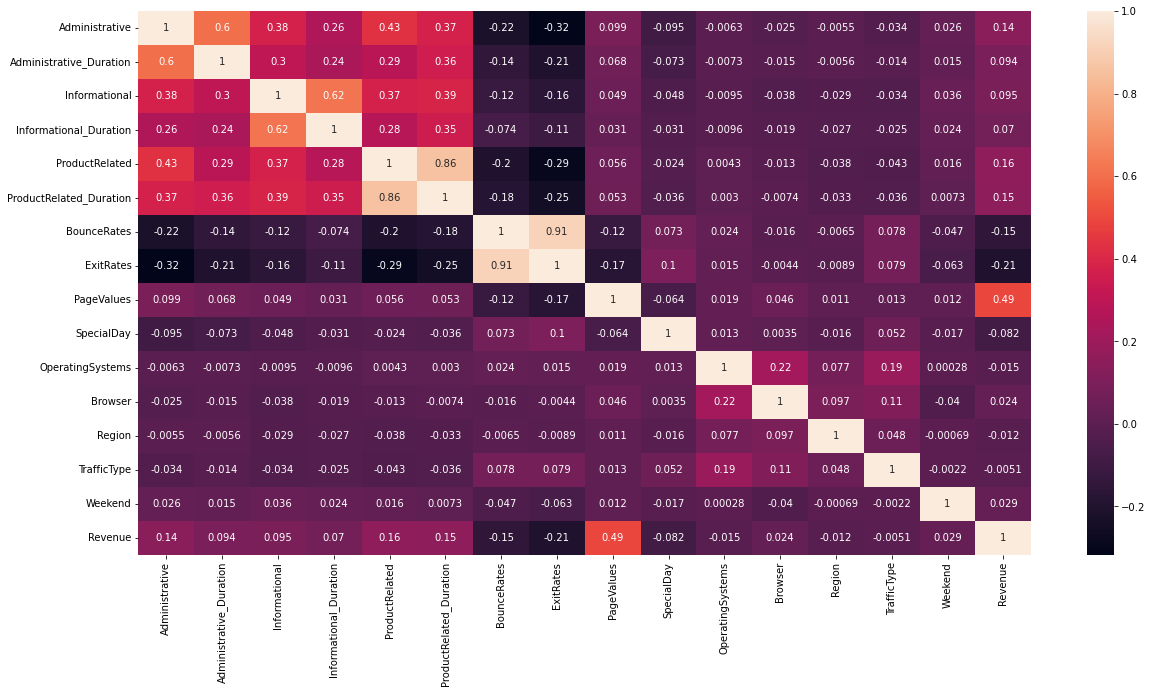

In [107]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

- ProductRelated_Duration and ProductRelated having strong positive correlation.
- BounceRates and ExitRates having strong positive correlation.

# Multivariate Analysis

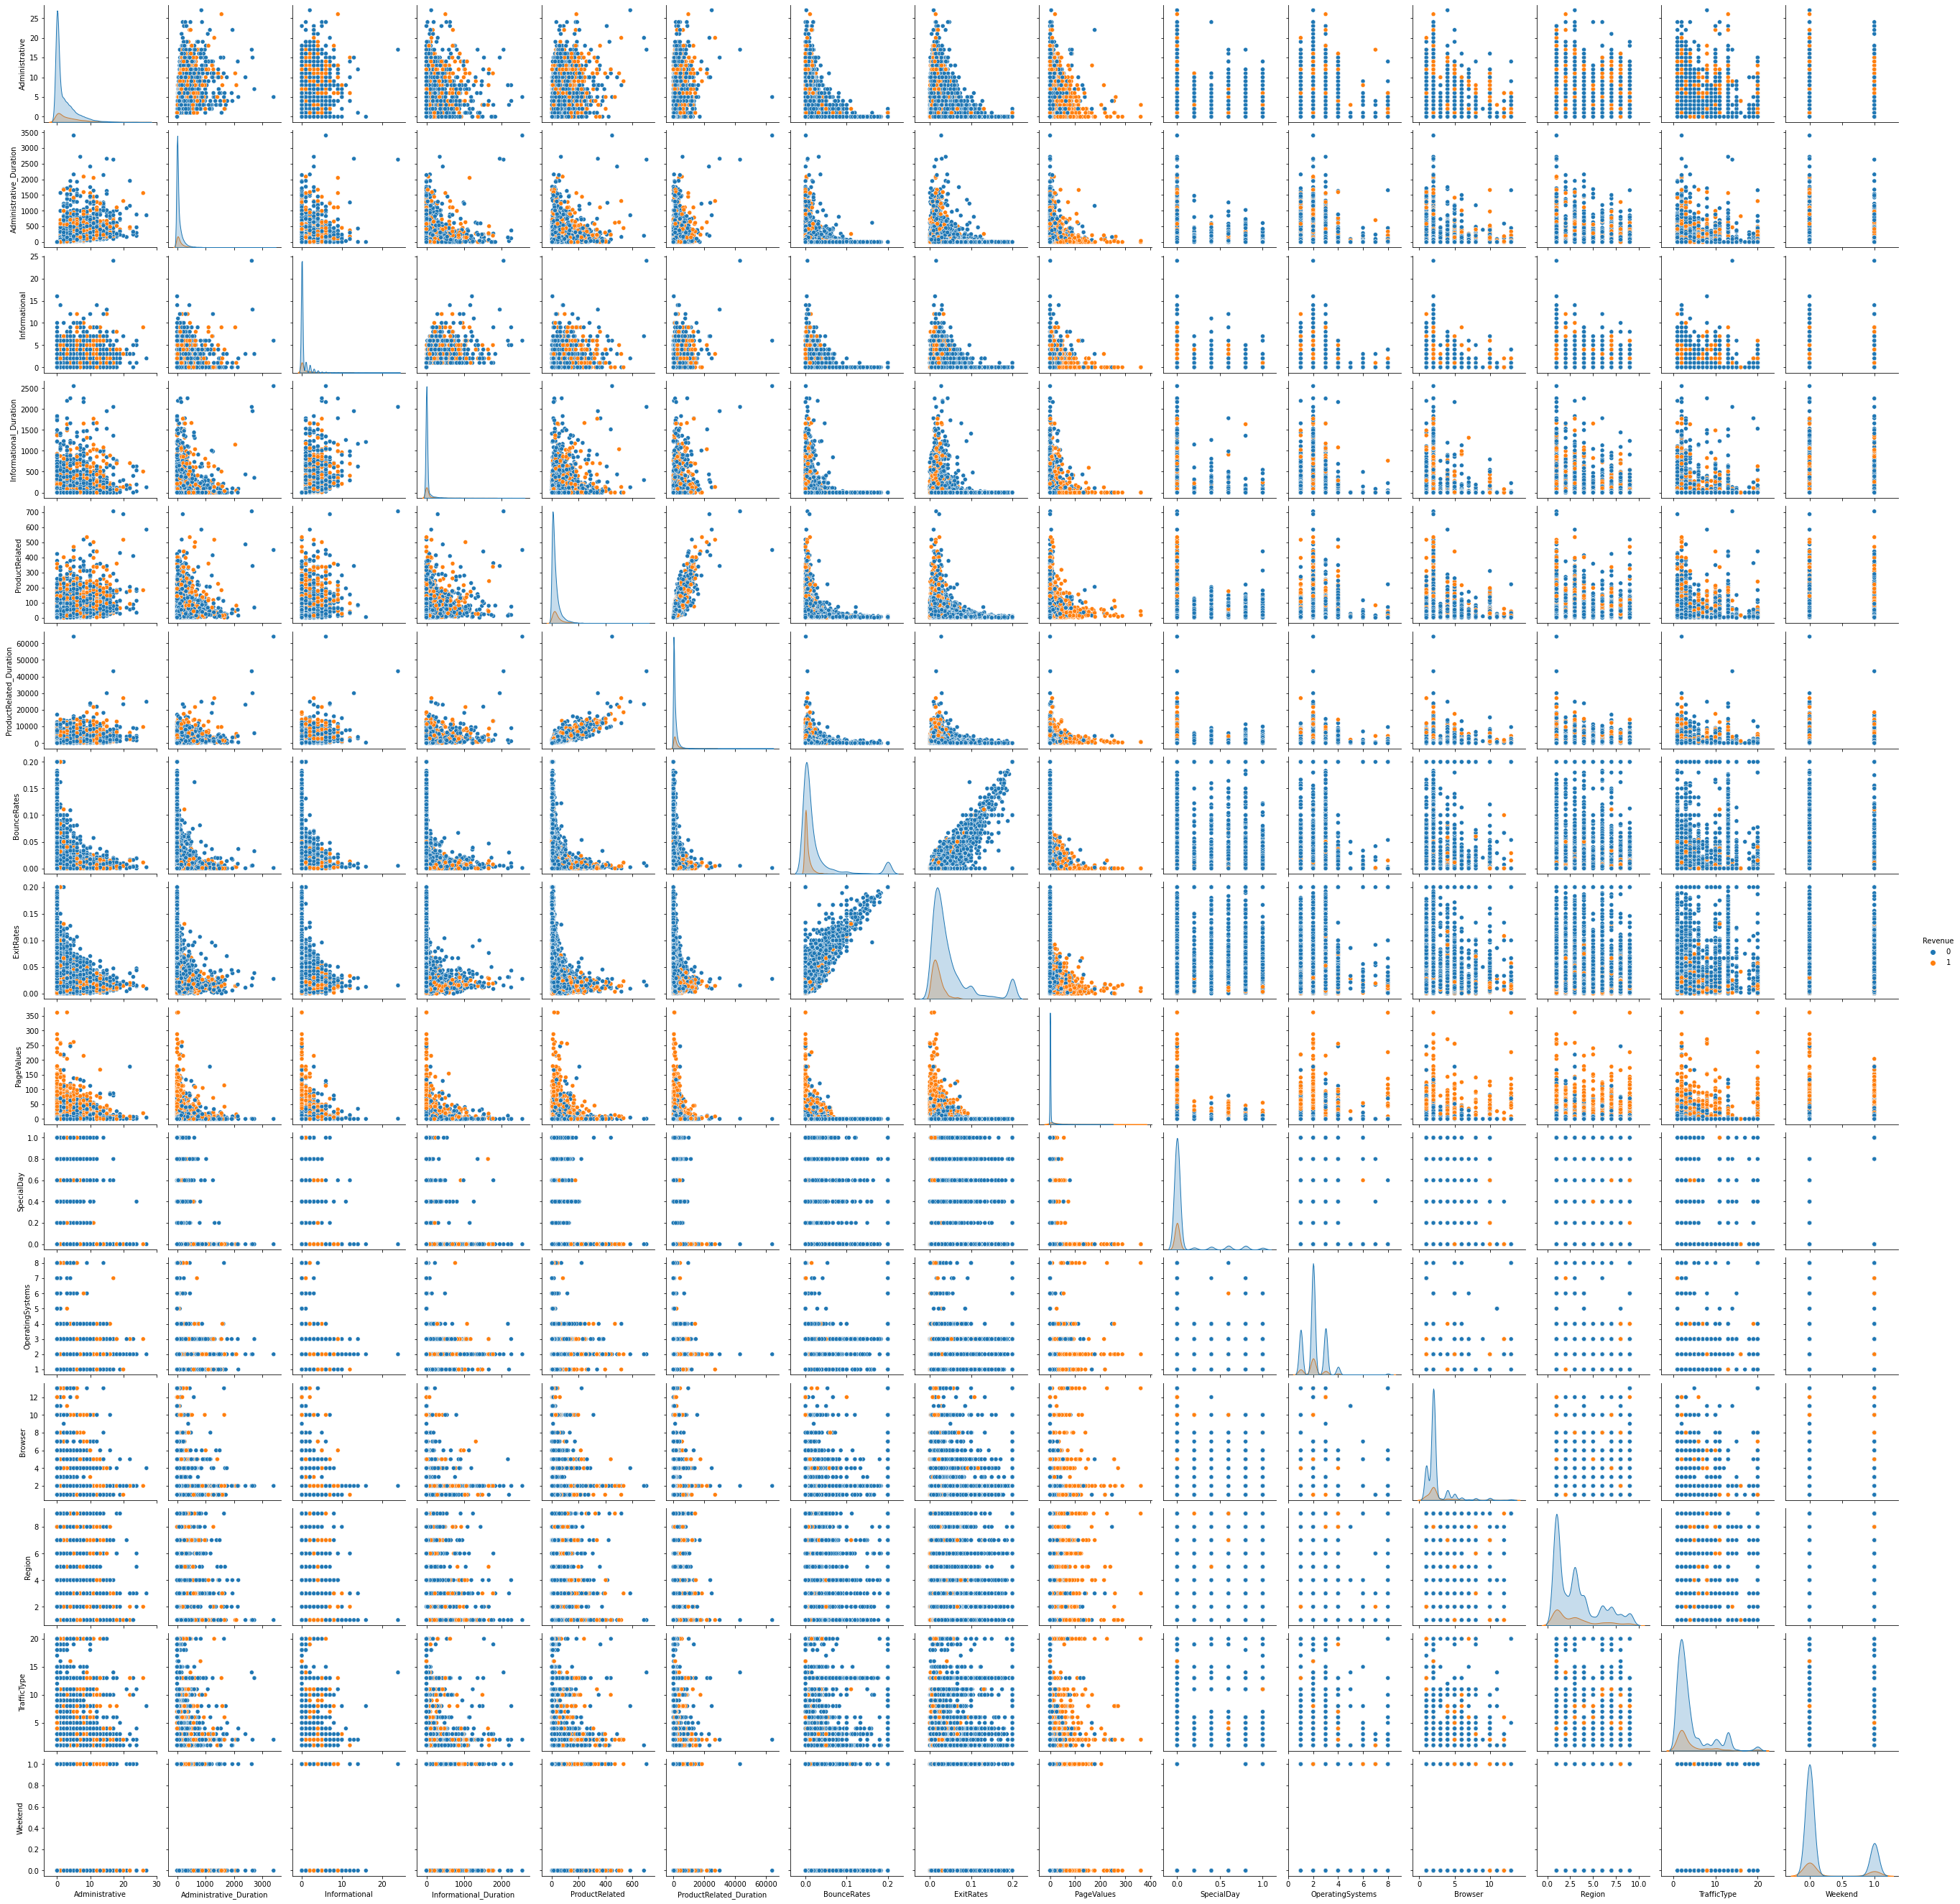

In [108]:
sns.pairplot(df,hue='Revenue')
plt.show()

- From above pairplot we can see there is too much overlaping in datapoints.
- And not perfectly arranged data no patterns formed.

# Data Manupulation

<b>Checking Outliers</b>

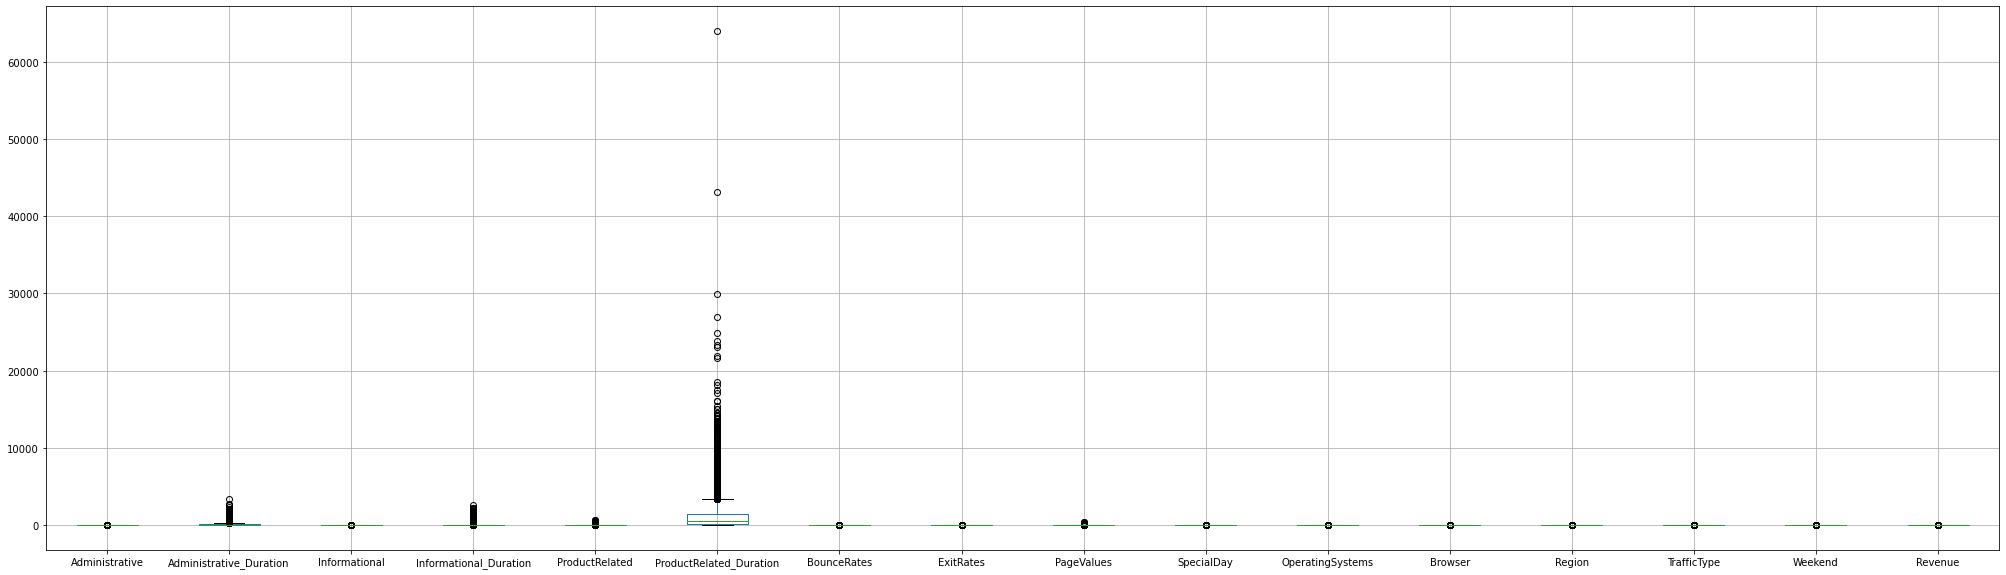

In [162]:
plt.figure(figsize=(35,10))
num_cols.boxplot()
plt.show()

- ProductRelated_Duration having maximum range so we can check outlier without this column.

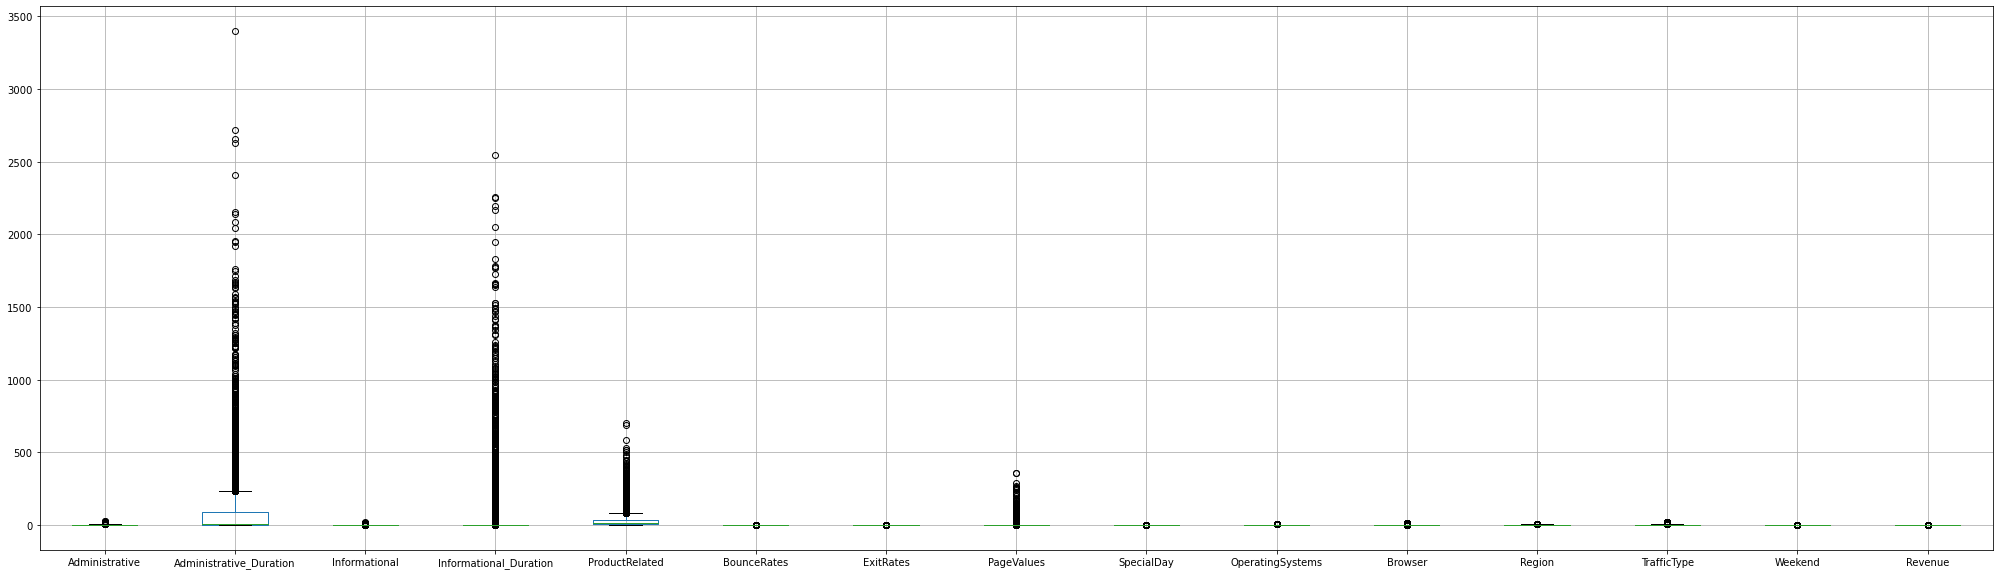

In [163]:
plt.figure(figsize=(35,10))
num_cols.drop('ProductRelated_Duration',axis=1).boxplot()
plt.show()

- Again checking outliers without Informational_Duration and Administative_Duration column

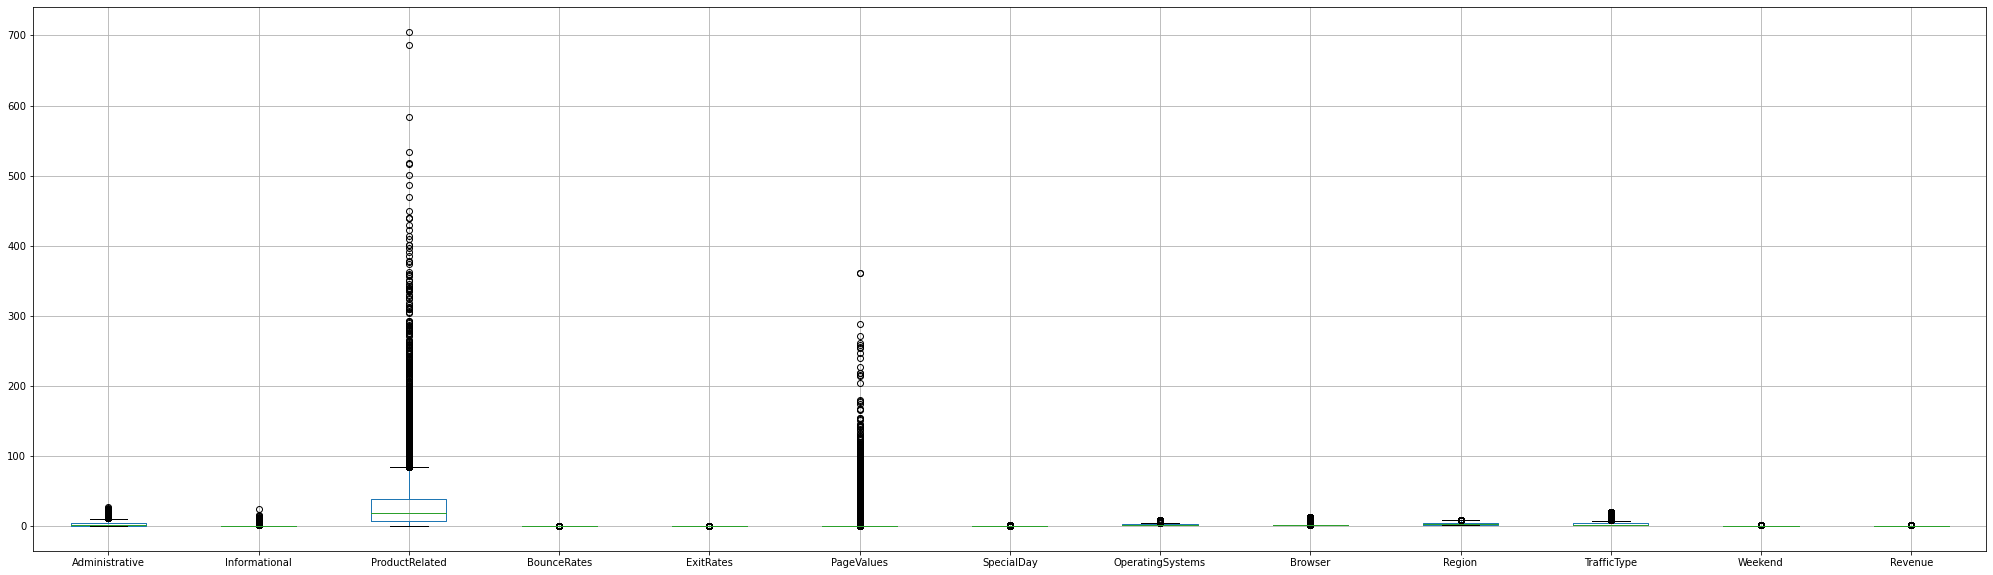

In [164]:
plt.figure(figsize=(35,10))
num_cols.drop(['ProductRelated_Duration','Administrative_Duration','Informational_Duration'],axis=1).boxplot()
plt.show()

- Again doing same for ProductRelated and PageValues column.

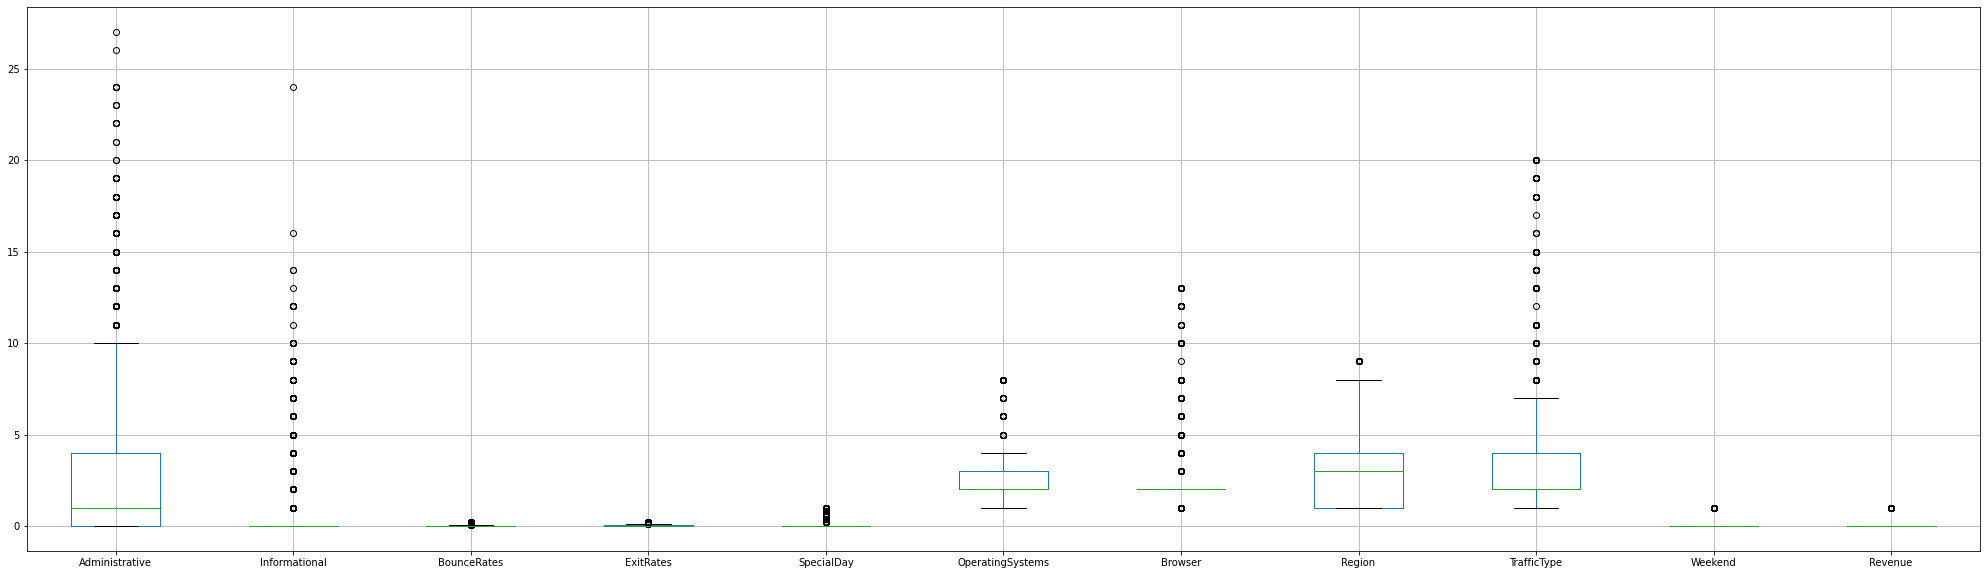

In [165]:
plt.figure(figsize=(35,10))
num_cols.drop(['ProductRelated_Duration','Administrative_Duration','Informational_Duration','PageValues','ProductRelated'],axis=1).boxplot()
plt.show()

- So from analysis we see there are much more outliers in these ('ProductRelated_Duration','Administrative_Duration','Informational_Duration','PageValues','ProductRelated') columns we can do IQR treatment for outliers.
- We can scale our data for treating outliers.

In [182]:
ss = StandardScaler() # robust scaling for outlier treatment

In [184]:
num_scale = pd.DataFrame(ss.fit_transform(num_cols),columns=num_cols.columns)

In [186]:
pt= PowerTransformer()

In [188]:
num_scale_ = pd.DataFrame(pt.fit_transform(num_scale), columns=num_scale.columns)
num_scale_.head()

Administrative  Administrative_Duration  Informational  \
0       -0.940351                -0.858369      -0.520024   
1       -0.940351                -0.858369      -0.520024   
2       -0.940351                -0.858369      -0.520024   
3       -0.940351                -0.858369      -0.520024   
4       -0.940351                -0.858369      -0.520024   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0               -0.465458       -1.450075                -1.330275   
1               -0.465458       -1.352280                -1.178672   
2               -0.465458       -1.450075                -1.330275   
3               -0.465458       -1.352280                -1.323835   
4               -0.465458       -0.653385                -0.093613   

   BounceRates  ExitRates  PageValues  SpecialDay  OperatingSystems   Browser  \
0     2.030343   1.923823   -0.511928   -0.336028         -1.596022 -1.650830   
1    -0.847816   1.467948   -0.511928   -0.336028          0.029020  0.111977   
2     2.030343   1.923823   -0.511928   -0.336028          1.783765 -1.650830   
3     1.652568   1.714169   -0.511928   -0.336028          1.053958  0.111977   
4     0.918028   0.775135   -0.511928   -0.336028          1.053958  0.969133   

     Region  TrafficType   Weekend   Revenue  
0 -1.083093    -1.341450 -0.550552 -0.427872  
1 -1.083093    -0.486413 -0.550552 -0.427872  
2  1.758913     0.152530 -0.550552 -0.427872  
3 -0.304402     0.603422 -0.550552 -0.427872  
4 -1.083093     0.603422  1.816360 -0.427872

<b>Creating Dummy Variables For Categorical Data</b>

In [189]:
cat_dummy = pd.get_dummies(cat_cols,drop_first=True)

In [190]:
cat_dummy.head()

VisitorType_Other  VisitorType_Returning_Visitor
0                  0                              1
1                  0                              1
2                  0                              1
3                  0                              1
4                  0                              1

In [193]:
final_data = pd.concat([num_scale_,cat_dummy],axis=1)
final_data.head()

Administrative  Administrative_Duration  Informational  \
0       -0.940351                -0.858369      -0.520024   
1       -0.940351                -0.858369      -0.520024   
2       -0.940351                -0.858369      -0.520024   
3       -0.940351                -0.858369      -0.520024   
4       -0.940351                -0.858369      -0.520024   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0               -0.465458       -1.450075                -1.330275   
1               -0.465458       -1.352280                -1.178672   
2               -0.465458       -1.450075                -1.330275   
3               -0.465458       -1.352280                -1.323835   
4               -0.465458       -0.653385                -0.093613   

   BounceRates  ExitRates  PageValues  SpecialDay  OperatingSystems   Browser  \
0     2.030343   1.923823   -0.511928   -0.336028         -1.596022 -1.650830   
1    -0.847816   1.467948   -0.511928   -0.336028          0.029020  0.111977   
2     2.030343   1.923823   -0.511928   -0.336028          1.783765 -1.650830   
3     1.652568   1.714169   -0.511928   -0.336028          1.053958  0.111977   
4     0.918028   0.775135   -0.511928   -0.336028          1.053958  0.969133   

     Region  TrafficType   Weekend   Revenue  VisitorType_Other  \
0 -1.083093    -1.341450 -0.550552 -0.427872                  0   
1 -1.083093    -0.486413 -0.550552 -0.427872                  0   
2  1.758913     0.152530 -0.550552 -0.427872                  0   
3 -0.304402     0.603422 -0.550552 -0.427872                  0   
4 -1.083093     0.603422  1.816360 -0.427872                  0   

   VisitorType_Returning_Visitor  
0                              1  
1                              1  
2                              1  
3                              1  
4                              1

# Building Clusters

<b>KMeans Clustering</b>

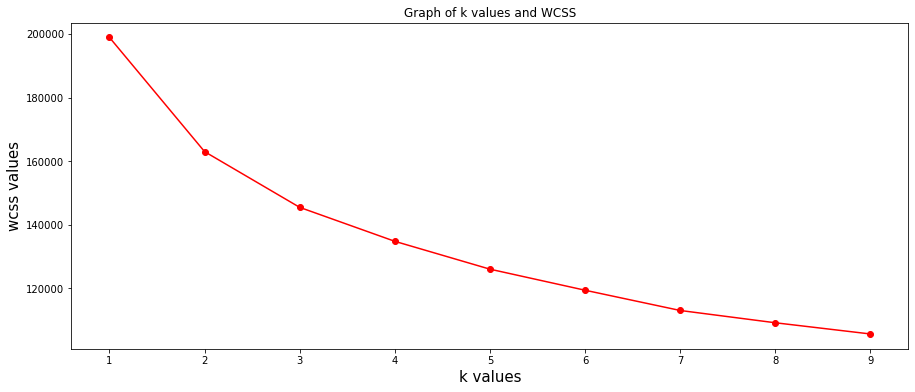

In [197]:
wcss = []

for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(final_data)
    wcss.append(kmeans.inertia_)
    
# Visualization of k values:

plt.figure(figsize=(15,6))
plt.plot(range(1,10), wcss, color='red',marker='o')
plt.title('Graph of k values and WCSS')
plt.xlabel('k values',size=15)
plt.ylabel('wcss values',size=15)
plt.show()

In [198]:
c=[2,3,4,5,6,7,8]
for i in c:
    model = KMeans(n_clusters=i)
    model.fit_predict(final_data)
    score = silhouette_score(final_data, model.labels_)
    print(f'silhouette score for {i} cluster is: {round(score,4)}')

silhouette score for 2 cluster is: 0.1751
silhouette score for 3 cluster is: 0.1508
silhouette score for 4 cluster is: 0.1483
silhouette score for 5 cluster is: 0.1555
silhouette score for 6 cluster is: 0.1423
silhouette score for 7 cluster is: 0.1395
silhouette score for 8 cluster is: 0.1382


In [199]:
# k = 2

In [200]:
kmeans = KMeans(n_clusters=2)
label_k = kmeans.fit_predict(final_data)

In [201]:
df_k = final_data.copy()
df_k['label'] = label_k
df_k.head()

Administrative  Administrative_Duration  Informational  \
0       -0.940351                -0.858369      -0.520024   
1       -0.940351                -0.858369      -0.520024   
2       -0.940351                -0.858369      -0.520024   
3       -0.940351                -0.858369      -0.520024   
4       -0.940351                -0.858369      -0.520024   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0               -0.465458       -1.450075                -1.330275   
1               -0.465458       -1.352280                -1.178672   
2               -0.465458       -1.450075                -1.330275   
3               -0.465458       -1.352280                -1.323835   
4               -0.465458       -0.653385                -0.093613   

   BounceRates  ExitRates  PageValues  SpecialDay  OperatingSystems   Browser  \
0     2.030343   1.923823   -0.511928   -0.336028         -1.596022 -1.650830   
1    -0.847816   1.467948   -0.511928   -0.336028          0.029020  0.111977   
2     2.030343   1.923823   -0.511928   -0.336028          1.783765 -1.650830   
3     1.652568   1.714169   -0.511928   -0.336028          1.053958  0.111977   
4     0.918028   0.775135   -0.511928   -0.336028          1.053958  0.969133   

     Region  TrafficType   Weekend   Revenue  VisitorType_Other  \
0 -1.083093    -1.341450 -0.550552 -0.427872                  0   
1 -1.083093    -0.486413 -0.550552 -0.427872                  0   
2  1.758913     0.152530 -0.550552 -0.427872                  0   
3 -0.304402     0.603422 -0.550552 -0.427872                  0   
4 -1.083093     0.603422  1.816360 -0.427872                  0   

   VisitorType_Returning_Visitor  label  
0                              1      0  
1                              1      0  
2                              1      0  
3                              1      0  
4                              1      0

In [219]:
df_k['label'].value_counts()/len(df_k)*100 # percentage of cluster 0 and 1 with respective to the number of observations.

0    56.593674
1    43.406326
Name: label, dtype: float64

In [220]:
print('Original Data Classes:')
print(df.Revenue.value_counts())
print('Predicted Data Classes:')
print(df_k.label.value_counts())

Original Data Classes:
0    10422
1     1908
Name: Revenue, dtype: int64
Predicted Data Classes:
0    6978
1    5352
Name: label, dtype: int64


- Comparing the cluster labels of KMeans with original labels('Revenue') column of this dataset shows that the number of observations in each cluster are not same.

<b>Agglomerative Clustering<b>

In [211]:
merg = linkage(final_data, method='ward')
c,coph_dists=cophenet(merg,pdist(final_data))
print(c)
print(coph_dists)

0.5788717857371201
[178.11950061  67.90724866  67.90724866 ... 178.11950061 178.11950061
  93.73204738]


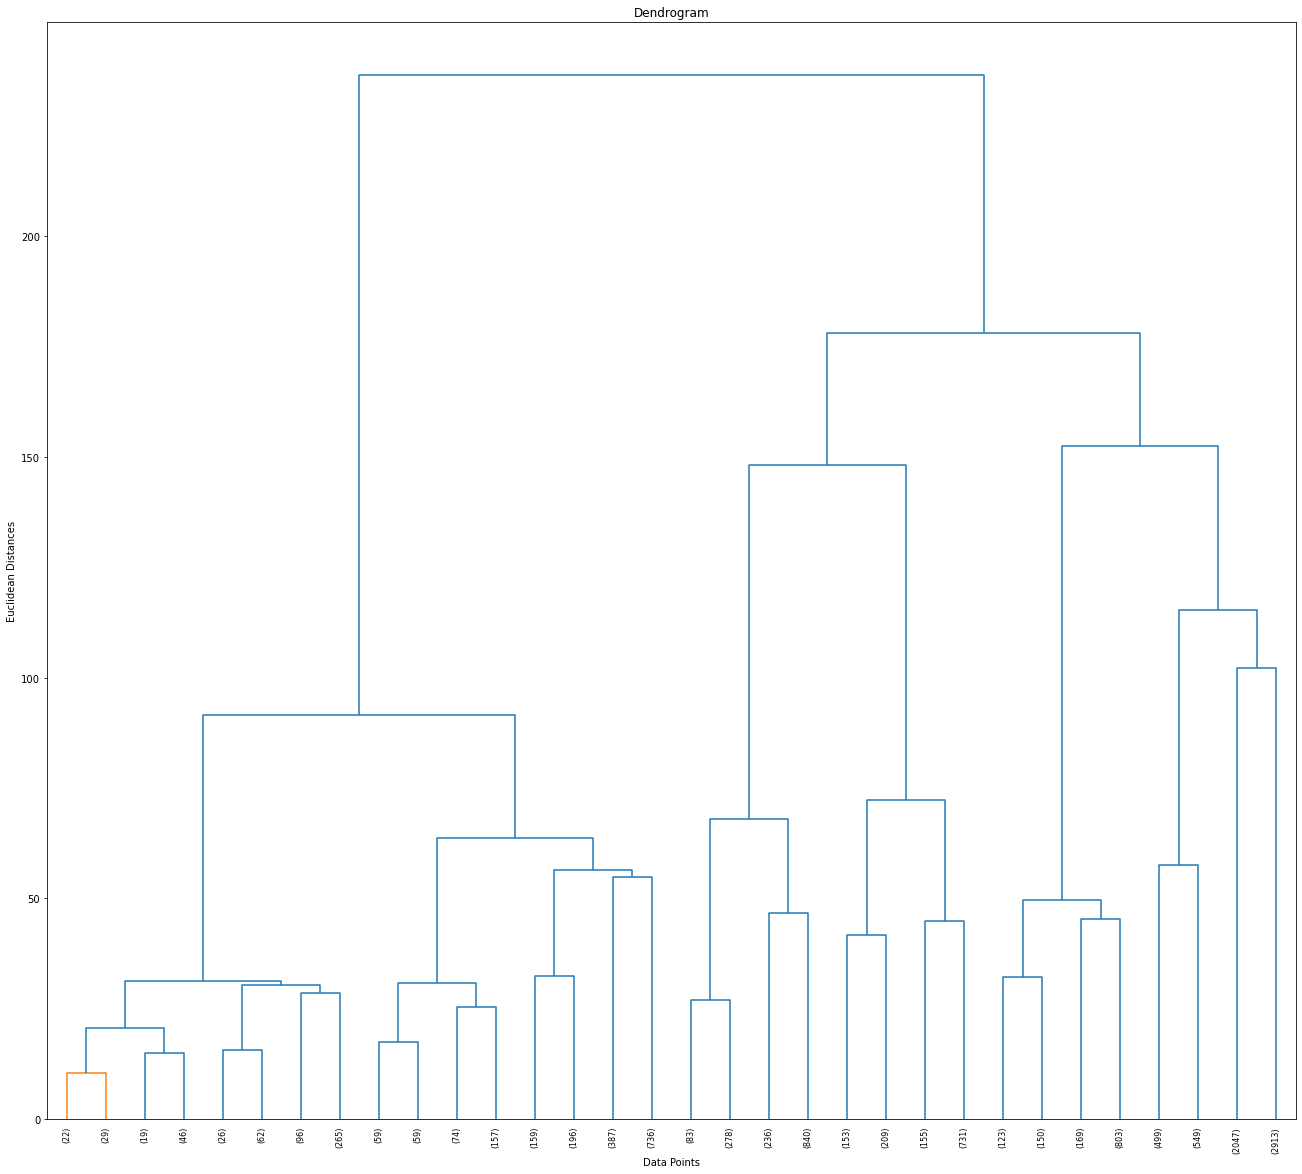

In [212]:
plt.figure(figsize=(18,16))
dendrogram(merg, leaf_rotation=90.0,color_threshold=15,leaf_font_size=8,truncate_mode='level',p=4)
plt.tight_layout()
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show()

In [213]:
c=[2,3,4,5,6,7,8]
for i in c:
    model = AgglomerativeClustering(n_clusters=i)
    model.fit_predict(final_data)
    score = silhouette_score(final_data, model.labels_)
    print(f'silhouette score for {i} cluster is: {round(score,4)}')

silhouette score for 2 cluster is: 0.1914
silhouette score for 3 cluster is: 0.1343
silhouette score for 4 cluster is: 0.1383
silhouette score for 5 cluster is: 0.1357
silhouette score for 6 cluster is: 0.1269
silhouette score for 7 cluster is: 0.1045
silhouette score for 8 cluster is: 0.1103


In [ ]:
# k = 2

In [214]:
agg = AgglomerativeClustering(n_clusters=2)
label_a = agg.fit_predict(final_data)

In [215]:
df_a = final_data.copy()
df_a['label'] = label_a
df_a.head()

Administrative  Administrative_Duration  Informational  \
0       -0.940351                -0.858369      -0.520024   
1       -0.940351                -0.858369      -0.520024   
2       -0.940351                -0.858369      -0.520024   
3       -0.940351                -0.858369      -0.520024   
4       -0.940351                -0.858369      -0.520024   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0               -0.465458       -1.450075                -1.330275   
1               -0.465458       -1.352280                -1.178672   
2               -0.465458       -1.450075                -1.330275   
3               -0.465458       -1.352280                -1.323835   
4               -0.465458       -0.653385                -0.093613   

   BounceRates  ExitRates  PageValues  SpecialDay  OperatingSystems   Browser  \
0     2.030343   1.923823   -0.511928   -0.336028         -1.596022 -1.650830   
1    -0.847816   1.467948   -0.511928   -0.336028          0.029020  0.111977   
2     2.030343   1.923823   -0.511928   -0.336028          1.783765 -1.650830   
3     1.652568   1.714169   -0.511928   -0.336028          1.053958  0.111977   
4     0.918028   0.775135   -0.511928   -0.336028          1.053958  0.969133   

     Region  TrafficType   Weekend   Revenue  VisitorType_Other  \
0 -1.083093    -1.341450 -0.550552 -0.427872                  0   
1 -1.083093    -0.486413 -0.550552 -0.427872                  0   
2  1.758913     0.152530 -0.550552 -0.427872                  0   
3 -0.304402     0.603422 -0.550552 -0.427872                  0   
4 -1.083093     0.603422  1.816360 -0.427872                  0   

   VisitorType_Returning_Visitor  label  
0                              1      0  
1                              1      0  
2                              1      0  
3                              1      0  
4                              1      0

In [217]:
df_a['label'].value_counts()/len(df_a)*100 # percentage of cluster 0 and 1 with respective to the number of observations.

0    80.600162
1    19.399838
Name: label, dtype: float64

In [221]:
print('Original Data Classes:')
print(df.Revenue.value_counts())
print('Predicted Data Classes:')
print(df_a.label.value_counts())

Original Data Classes:
0    10422
1     1908
Name: Revenue, dtype: int64
Predicted Data Classes:
0    9938
1    2392
Name: label, dtype: int64


- Comparing the cluster labels of AgglomerativeClustering with original labels('Revenue') column of this dataset shows that the number of observations in each cluster are approximately same.
- We can depict the same with the boxplot of any variable by label/Revenue.

<b>Plotting Clusters</b>

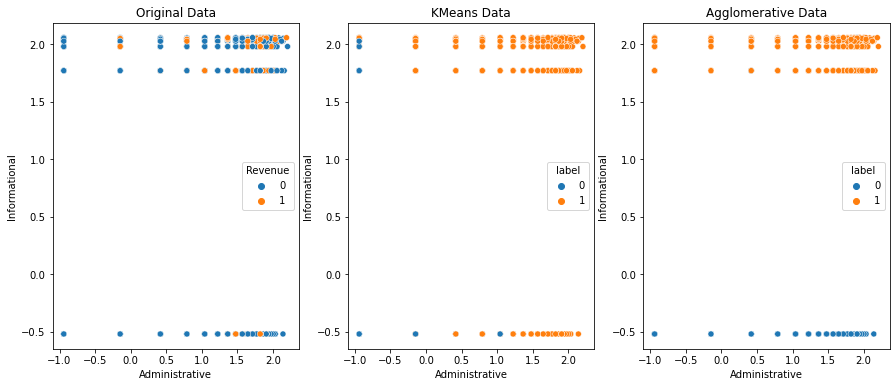

In [226]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
plt.title("Original Data")
sns.scatterplot(x=final_data['Administrative'] , y=final_data['Informational'],data=num_cols, hue=num_cols['Revenue'], palette='tab10' )
plt.subplot(1,3,2)
plt.title("KMeans Data")
sns.scatterplot(x=df_k['Administrative'] , y=df_k['Informational'],data=df_k, hue=df_k['label'], palette='tab10' )
plt.subplot(1,3,3)
plt.title("Agglomerative Data")
sns.scatterplot(x=df_a['Administrative'] , y=df_a['Informational'],data=df_a, hue=df_a['label'], palette='tab10' )
plt.show()

<b>Business Interpretation:</b>

- From above plots we can see Agglomerative forms good cluster without overlapping.
- As it means that there are more customers who can buy products and very less customers that they came on website and go back without purchasing any product.
- So customers who can buy products when he/she came on the eccomerce site are very less.
- Thus we can offer to them some exciting offers and discounts on the products.
- For those who consistently visit the site but never bought, we can provide some extra offers for them like more than 50% off on buying 2 or 3 products.
- And those who buy products as in a month or in between 6 months in a year we can give them Special bonanza offer like special festival offers.

# EDA On Cluster Groups

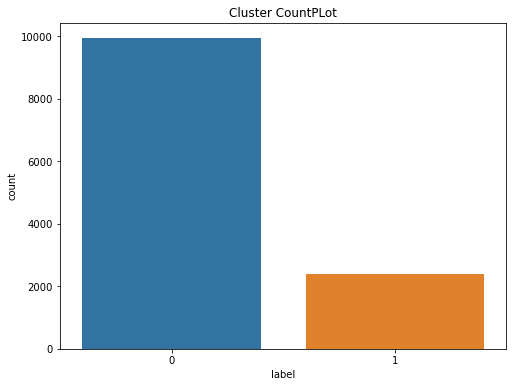

In [249]:
plt.figure(figsize=(8,6))
sns.countplot(df_a['label'])
plt.title("Cluster CountPLot")
plt.show()

- Number of customers not making revenue for eccomerce company as they only visit site but did't bought anything.

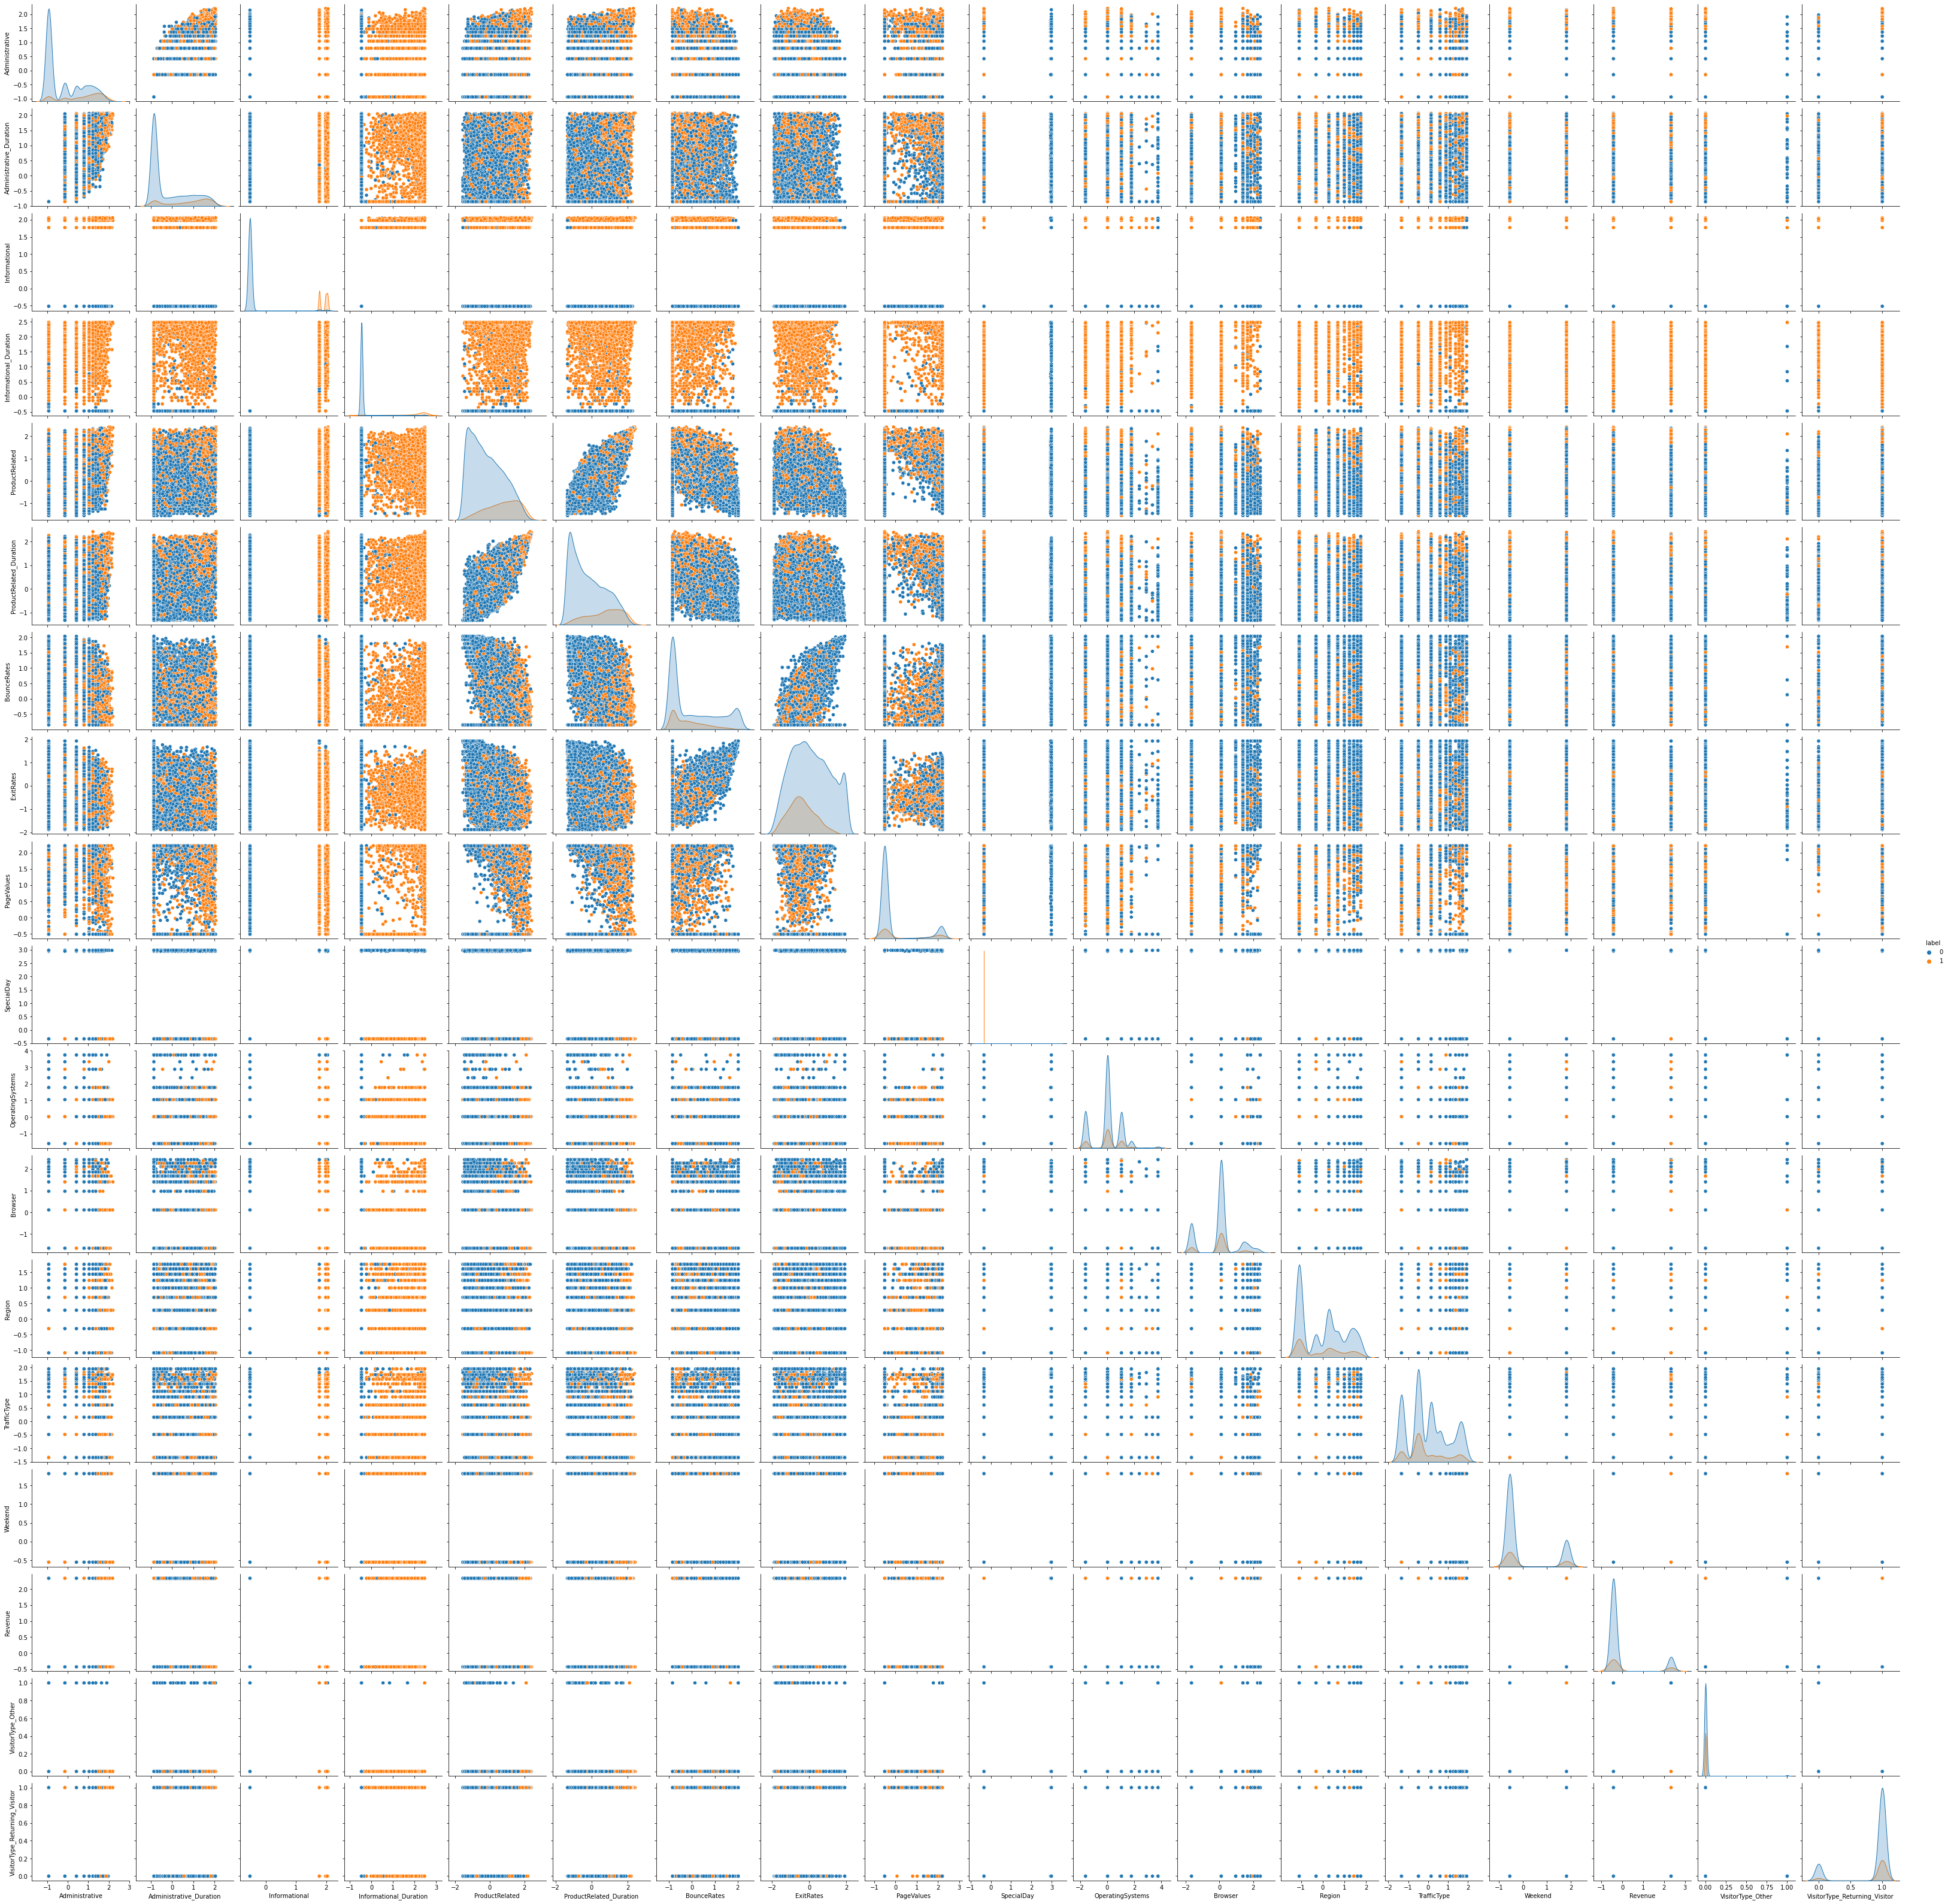

In [250]:
sns.pairplot(df_a,hue='label') 
plt.show()

- We can see from above plot some what data is sorted but still there is overlapping in most of the columns.
- As clusters are overlapping we can do PCA for much more clear custers without overlapping.

# Principal Component Analysis

In [ ]:
pca_model = PCA()
pca_val = pca_model.fit_transform(final_data)

In [228]:
pca_val.shape # printing rows and columns

(12330, 18)

In [237]:
var_exp = pca_model.explained_variance_ # Eigen Values
var_exp

array([4.21961794, 1.62649885, 1.48806701, 1.27989438, 1.12253032,
       1.08295276, 1.02156349, 0.97089864, 0.96044439, 0.80807965,
       0.54653516, 0.35843545, 0.23854248, 0.12587275, 0.09740885,
       0.09227545, 0.08585603, 0.00614582])

In [232]:
pca_model.components_ # Eigen Vector

array([[ 3.69028429e-01,  3.58099771e-01,  3.03192516e-01,
         3.01306289e-01,  3.74695137e-01,  3.66693453e-01,
        -2.16271788e-01, -3.38435123e-01,  2.61191427e-01,
        -8.54635493e-02,  2.44007990e-03,  1.11062472e-02,
        -3.17698728e-03, -3.15651000e-02,  3.87088672e-02,
         1.96053433e-01, -1.44424415e-03, -1.00447100e-02],
       [ 3.77235090e-02,  4.14564004e-02,  4.93023881e-01,
         4.86255172e-01,  3.20162913e-02,  3.72263798e-02,
         4.30110091e-01,  3.52715101e-01, -2.36954812e-01,
         1.49731781e-01, -7.10161227e-02, -1.32715156e-01,
        -5.60409950e-02, -5.51903745e-03, -2.09437387e-02,
        -3.08500769e-01, -4.22714598e-03,  7.41896689e-02],
       [-5.70931506e-02, -7.49726962e-02,  4.30687552e-02,
         4.37087464e-02,  1.08332653e-01,  1.14499596e-01,
         8.58841400e-02,  5.92566186e-02, -4.33435527e-03,
         1.59109321e-01,  6.64472359e-01,  6.56496224e-01,
         1.18083256e-01,  1.42407014e-01, -1.33874482e

In [234]:
pca_model.explained_variance_ratio_ # Variance

array([0.26157435, 0.10082676, 0.09224536, 0.07934073, 0.06958572,
       0.0671323 , 0.06332678, 0.06018606, 0.059538  , 0.0500929 ,
       0.03387975, 0.02221943, 0.01478726, 0.00780286, 0.00603838,
       0.00572016, 0.00532222, 0.00038098])

In [238]:
cum_var = np.round(np.cumsum(pca_model.explained_variance_ratio_)*100,2) # Cumulutive Variance
cum_var

array([ 26.16,  36.24,  45.46,  53.4 ,  60.36,  67.07,  73.4 ,  79.42,
        85.38,  90.38,  93.77,  95.99,  97.47,  98.25,  98.86,  99.43,
        99.96, 100.  ])

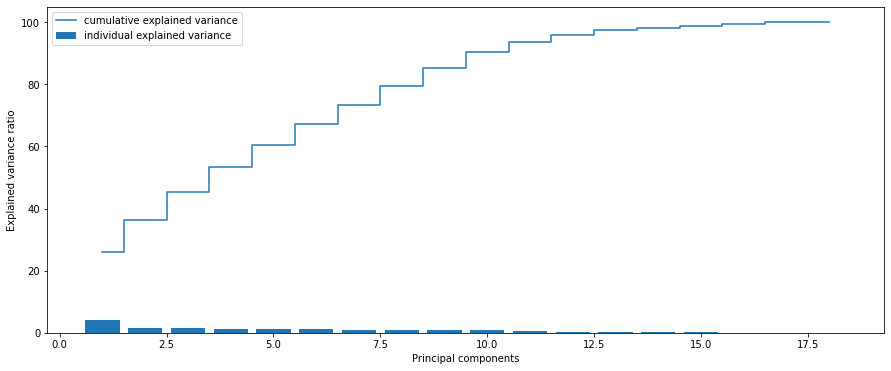

In [241]:
plt.figure(figsize=(15,6))
plt.bar(range(1,19), var_exp, align='center', label='individual explained variance')
plt.step(range(1,19),cum_var, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

- As for 95% variance of the data we select 12 variables having variance value upto 95.99% 
- Number of Components = 12

In [251]:
pca = PCA(n_components=12)
pca_new = pd.DataFrame(pca.fit_transform(final_data), columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12'])
pca_new.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -3.261719  1.527898 -2.369946  1.026010  0.275548 -0.310539 -1.276434   
1 -2.396181 -0.216121 -0.257361 -0.050938 -0.175179 -0.744970  0.052832   
2 -3.309659  1.120365  0.424175  0.558134 -1.333103  0.481390 -1.339170   
3 -3.107878  0.818321  0.883545  0.616704 -0.814278  0.363990 -0.273372   
4 -1.814614  0.119659  1.135289  0.098921 -0.550931 -0.678955  1.389666   

        PC8       PC9      PC10      PC11      PC12  
0 -0.823535 -0.865478 -0.048234  0.075347 -0.038412  
1 -1.575627 -0.024481  0.282076 -0.006710 -0.188599  
2  0.943777  0.308915 -0.874184  2.333891  0.010183  
3 -0.626875 -0.547254 -0.692921  0.519769 -0.049869  
4  0.368908 -1.939296 -0.169871 -0.234834 -0.072427

In [252]:
kmeans_pca = KMeans(n_clusters=2)

#Training the model:
kmeans_model = kmeans.fit(pca_new)
label_pca = kmeans_model.predict(pca_new)

In [253]:
df_pca = pca_new.copy(deep=True)
df_pca['label'] = label_pca

In [255]:
print('Original Data Classes:')
print(df.Revenue.value_counts())
print('Predicted Data Classes:')
print(df_pca['label'].value_counts())

Original Data Classes:
0    10422
1     1908
Name: Revenue, dtype: int64
Predicted Data Classes:
0    7004
1    5326
Name: label, dtype: int64


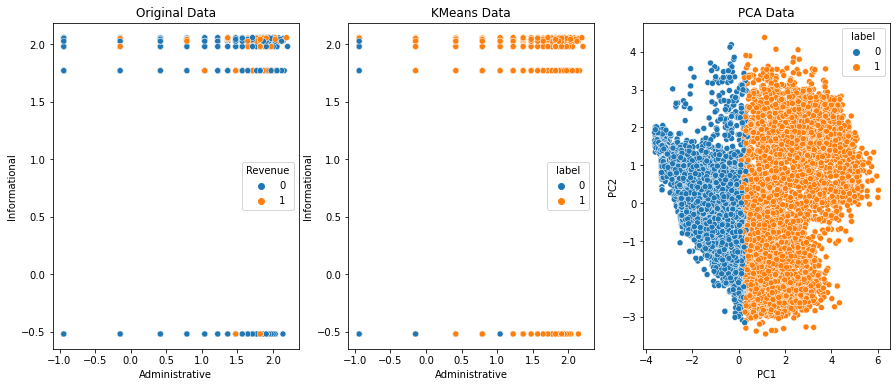

In [260]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
plt.title("Original Data")
sns.scatterplot(x=final_data['Administrative'] , y=final_data['Informational'],data=num_cols, hue=num_cols['Revenue'], palette='tab10' )
plt.subplot(1,3,2)
plt.title("KMeans Data")
sns.scatterplot(x=df_k['Administrative'] , y=df_k['Informational'],data=df_k, hue=df_k['label'], palette='tab10' )
plt.subplot(1,3,3)
plt.title("PCA Data")
sns.scatterplot(x=df_pca['PC1'] , y=df_pca['PC2'],data=df_pca, hue=df_pca['label'], palette='tab10' )
plt.show()

- As we can see from above plot the clusters formed by PCA data is much better than KMeans, Agglomerative and Original Data.
- No overlapping within clusters.
- We can say that PCA really helps making cluster better.
- Data is more cleaned for building classification model.

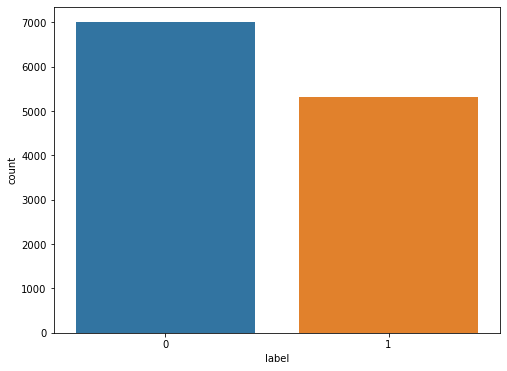

In [266]:
plt.figure(figsize=(8,6))
sns.countplot(df_pca['label'])
plt.show()

- Most of the customer are only visiters.
- They will not make any revenue for company.

<b>Interpretation:</b> Finally we can make our model as doing PCA for this dataset is very helpfull as there is no overlapping inbetween datapoints. As we can predict that the customer can make revenue for company or not accurately.